<a href="https://colab.research.google.com/github/PARIMIANUDHEER04/Computer-Vision/blob/main/Opimization_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def loss_fn(x,y):
  return x**2+y**2

**SGD**

In [3]:
params=torch.tensor([2,2],requires_grad=True,dtype=torch.float32)


In [4]:
params


tensor([2., 2.], requires_grad=True)

In [5]:
trajectory=[]

In [6]:
optimizer =torch.optim.SGD([params],lr=0.1)

In [ ]:
for epoch in range(30):
  optimizer.zero_grad()
  loss=loss_fn(params[0],params[1])
  loss.backward()
  optimizer.step()
  trajectory.append(params.clone().detach().numpy())

In [7]:
for epoch in range(30):
  loss=loss_fn(params[0],params[1])
  loss.backward()
  with torch.no_grad():
    params-=0.1*params.grad
  params.grad.zero_()
  trajectory.append(params.clone().detach().numpy())



In [8]:
trajectory=np.array(trajectory)

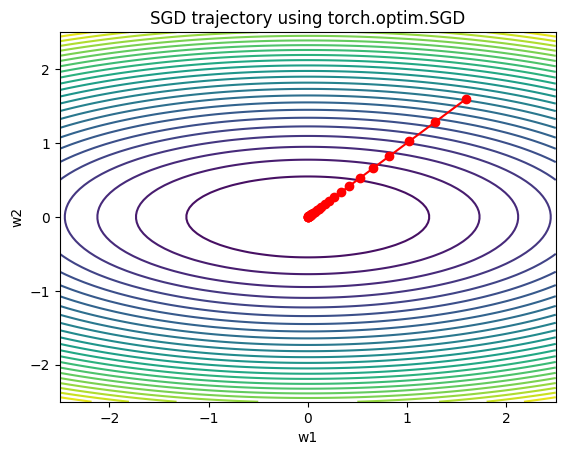

In [9]:
# Loss surface
w1 = np.linspace(-2.5, 2.5, 100)
w2 = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1, w2)
L = W1**2 + 5*W2**2

plt.contour(W1, W2, L, levels=30)
plt.plot(trajectory[:,0], trajectory[:,1], marker='o', color='red')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SGD trajectory using torch.optim.SGD')
plt.show()


**SGD** + *MOMENTUM*

In [10]:
params=torch.tensor([2,2],requires_grad=True,dtype=torch.float32)


In [11]:
trajectory=[]

In [12]:

optimizer =torch.optim.SGD([params],lr=0.1,momentum=0.1)

In [13]:
for epoch in range(30):
  optimizer.zero_grad()
  loss=loss_fn(params[0],params[1])
  loss.backward()
  optimizer.step()
  trajectory.append(params.clone().detach().numpy())

In [14]:
v=0.1

In [15]:
lr=0.1

In [16]:
for epoch in range(30):
  loss=loss_fn(params[0],params[1])
  loss.backward()
  with torch.no_grad():
    v=0.1*v-lr*params.grad
    params+=v
  params.grad.zero_()
  trajectory.append(params.clone().detach().numpy())



In [17]:
trajectory=np.array(trajectory)

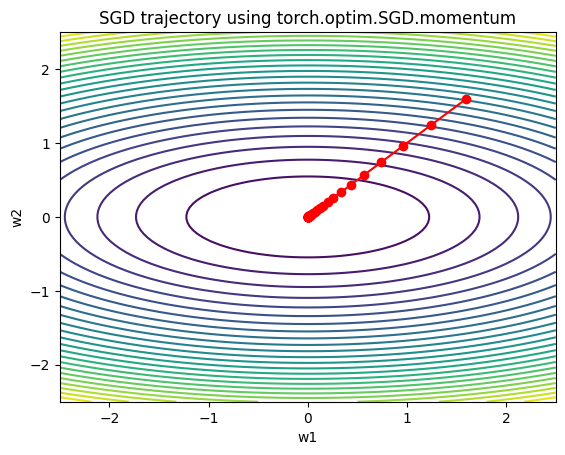

In [18]:
# Loss surface
w1 = np.linspace(-2.5, 2.5, 100)
w2 = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1, w2)
L = W1**2 + 5*W2**2

plt.contour(W1, W2, L, levels=30)
plt.plot(trajectory[:,0], trajectory[:,1], marker='o', color='red')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SGD trajectory using torch.optim.SGD.momentum')
plt.show()


**RMS PROP**

In [35]:
params=torch.tensor([2,2],requires_grad=True,dtype=torch.float32)


In [36]:
trajectory=[]

In [37]:
optimizer=torch.optim.RMSprop([params],lr=0.1,alpha=0.9)

In [32]:
for epoch in range(30):
  optimizer.zero_grad()
  loss=loss_fn(params[0],params[1])
  loss.backward()
  optimizer.step()
  trajectory.append(params.clone().detach().numpy())

In [38]:
lr=0.1

In [39]:
beta=0.9

In [40]:
dx=torch.zeros_like(params)

In [41]:
for epoch in range(30):
  loss=loss_fn(params[0],params[1])
  loss.backward()
  with torch.no_grad():
    g=params.grad
    dx=beta*dx+(1-beta)*g**2
    params-=lr/torch.sqrt(dx)+1e-8
  params.grad.zero_()
  trajectory.append(params.clone().detach().numpy())



In [42]:
trajectory=np.array(trajectory)

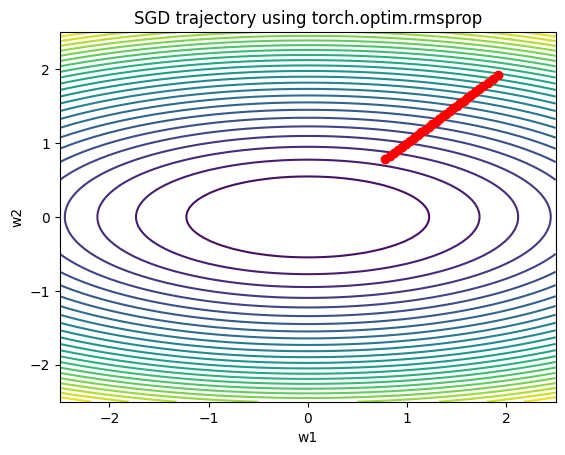

In [43]:
# Loss surface
w1 = np.linspace(-2.5, 2.5, 100)
w2 = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1, w2)
L = W1**2 + 5*W2**2

plt.contour(W1, W2, L, levels=30)
plt.plot(trajectory[:,0], trajectory[:,1], marker='o', color='red')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SGD trajectory using torch.optim.rmsprop')
plt.show()


**Adam**

In [ ]:
params=torch.tensor([2,2],requires_grad=True,dtype=torch.float32)


In [ ]:
trajectory=[]

In [ ]:
optimizer=torch.optim.Adam([params],lr=0.1,betas=(0.9,0.999))

In [ ]:
for epoch in range(30):
  optimizer.zero_grad()
  loss=loss_fn(params[0],params[1])
  loss.backward()
  optimizer.step()
  trajectory.append(params.clone().detach().numpy())

In [ ]:
lr = 0.1
beta1, beta2 = 0.9, 0.999
eps = 1e-8

In [ ]:
for epoch in range(30):
  loss=loss_fn(params[0],params[1])
  loss.backward()
  with torch.no_grad():
    g=params.grad
    dx=beta1*dx+(1-beta1)*g
    params-=lr/torch.sqrt(dx)+1e-8
  params.grad.zero_()
  trajectory.append(params.clone().detach().numpy())



In [ ]:
trajectory=np.array(trajectory)

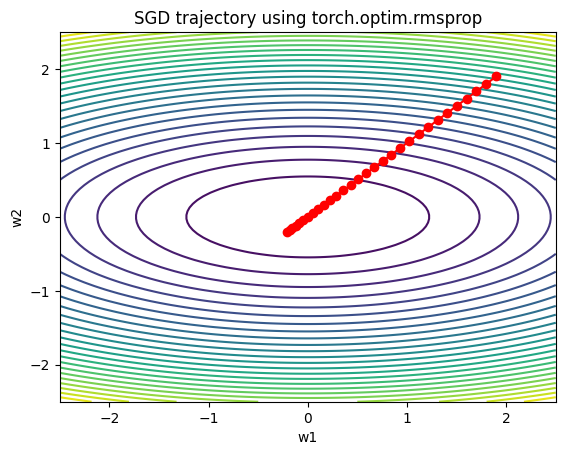

In [ ]:
# Loss surface
w1 = np.linspace(-2.5, 2.5, 100)
w2 = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1, w2)
L = W1**2 + 5*W2**2

plt.contour(W1, W2, L, levels=30)
plt.plot(trajectory[:,0], trajectory[:,1], marker='o', color='red')
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('SGD trajectory using torch.optim.rmsprop')
plt.show()
